In [1]:

!pip install pyspark -q

In [2]:
!pip install delta-spark==3.2.0 -q

 # Creating Spark Session

In [3]:
import pyspark
from delta import *
from pyspark.sql.functions import *

# Create a SparkSession with Delta Lake extensions
# The '.config(...)' lines are crucial for enabling Delta Lake's features
builder = pyspark.sql.SparkSession.builder.appName("DeltaTutorial") \
    .config("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension") \
    .config("spark.sql.catalog.spark_catalog", "org.apache.spark.sql.delta.catalog.DeltaCatalog")

# Get or create the SparkSession
spark = configure_spark_with_delta_pip(builder).getOrCreate()

print("Spark and Delta Lake are ready!")

Spark and Delta Lake are ready!


In [4]:
import pandas as pd
from pyspark.sql.functions import sum as spark_sum # Import Spark's sum function

# Load the CSV file with header and schema inference
df = spark.read.csv('/content/cleaned_expenses.csv', header=True, inferSchema=True)

# Display the data
print("Original data:")
df.show(5)

# 1. Create summary table with monthly spend by category
monthly_spend = df.groupby(['user_id', 'month', 'category']) \
                 .agg(spark_sum('amount').alias('total_amount')) \
                 .orderBy(['user_id', 'month'])

Original data:
+----------+-------+-----------+------+------------+--------------------+-------------------+-------------+
|expense_id|user_id|category_id|amount|expense_date|         description|              month|     category|
+----------+-------+-----------+------+------------+--------------------+-------------------+-------------+
|         1|      1|          1|1200.0|  2025-07-01|Monthly grocery s...|2025-07-01 00:00:00|    Groceries|
|         2|      1|          2| 300.0|  2025-07-02|            Bus pass|2025-07-01 00:00:00|    Transport|
|         3|      1|          3| 500.0|  2025-07-10|         Movie night|2025-07-01 00:00:00|Entertainment|
|         4|      2|          1| 900.0|  2025-07-03|             Grocery|2025-07-01 00:00:00|    Groceries|
|         5|      2|          4|1100.0|  2025-07-05|    Electricity bill|2025-07-01 00:00:00|    Utilities|
+----------+-------+-----------+------+------------+--------------------+-------------------+-------------+



# 2. Create total monthly spend per user

In [5]:
# 2. Create total monthly spend per user
total_monthly = df.groupby(['user_id', 'month']) \
                 .agg(spark_sum('amount').alias('total_spend')) \
                 .orderBy(['user_id', 'month'])

# 3. Add alerts (example: alert if any category spending > 1000)

In [6]:
from pyspark.sql.functions import when, col

alerts_df = monthly_spend.withColumn('alert', when(col('total_amount') > 1000, True).otherwise(False))

# Display results

In [7]:
print("\nMonthly spend by category:")
monthly_spend.show()

print("\nTotal monthly spend:")
total_monthly.show()

print("\nData with alerts:")
alerts_df.show()

# Save to CSV
monthly_spend.write.csv('monthly_spend_by_category.csv', header=True, mode='overwrite')
total_monthly.write.csv('total_monthly_spend.csv', header=True, mode='overwrite')
alerts_df.write.csv('alerts_data.csv', header=True, mode='overwrite')

print("\nFiles saved as CSV in directories:")
print("- monthly_spend_by_category.csv")
print("- total_monthly_spend.csv")
print("- alerts_data.csv")


Monthly spend by category:
+-------+-------------------+-------------+------------+
|user_id|              month|     category|total_amount|
+-------+-------------------+-------------+------------+
|      1|2025-07-01 00:00:00|    Transport|       300.0|
|      1|2025-07-01 00:00:00|Entertainment|       500.0|
|      1|2025-07-01 00:00:00|    Groceries|      1200.0|
|      2|2025-07-01 00:00:00|    Utilities|      1100.0|
|      2|2025-07-01 00:00:00|    Groceries|       900.0|
+-------+-------------------+-------------+------------+


Total monthly spend:
+-------+-------------------+-----------+
|user_id|              month|total_spend|
+-------+-------------------+-----------+
|      1|2025-07-01 00:00:00|     2000.0|
|      2|2025-07-01 00:00:00|     2000.0|
+-------+-------------------+-----------+


Data with alerts:
+-------+-------------------+-------------+------------+-----+
|user_id|              month|     category|total_amount|alert|
+-------+-------------------+---------

# Some Visualization

Original data:
+----------+-------+-----------+------+------------+--------------------+-------------------+-------------+
|expense_id|user_id|category_id|amount|expense_date|         description|              month|     category|
+----------+-------+-----------+------+------------+--------------------+-------------------+-------------+
|         1|      1|          1|1200.0|  2025-07-01|Monthly grocery s...|2025-07-01 00:00:00|    Groceries|
|         2|      1|          2| 300.0|  2025-07-02|            Bus pass|2025-07-01 00:00:00|    Transport|
|         3|      1|          3| 500.0|  2025-07-10|         Movie night|2025-07-01 00:00:00|Entertainment|
|         4|      2|          1| 900.0|  2025-07-03|             Grocery|2025-07-01 00:00:00|    Groceries|
|         5|      2|          4|1100.0|  2025-07-05|    Electricity bill|2025-07-01 00:00:00|    Utilities|
+----------+-------+-----------+------+------------+--------------------+-------------------+-------------+



/tmp/ipython-input-1692131449.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


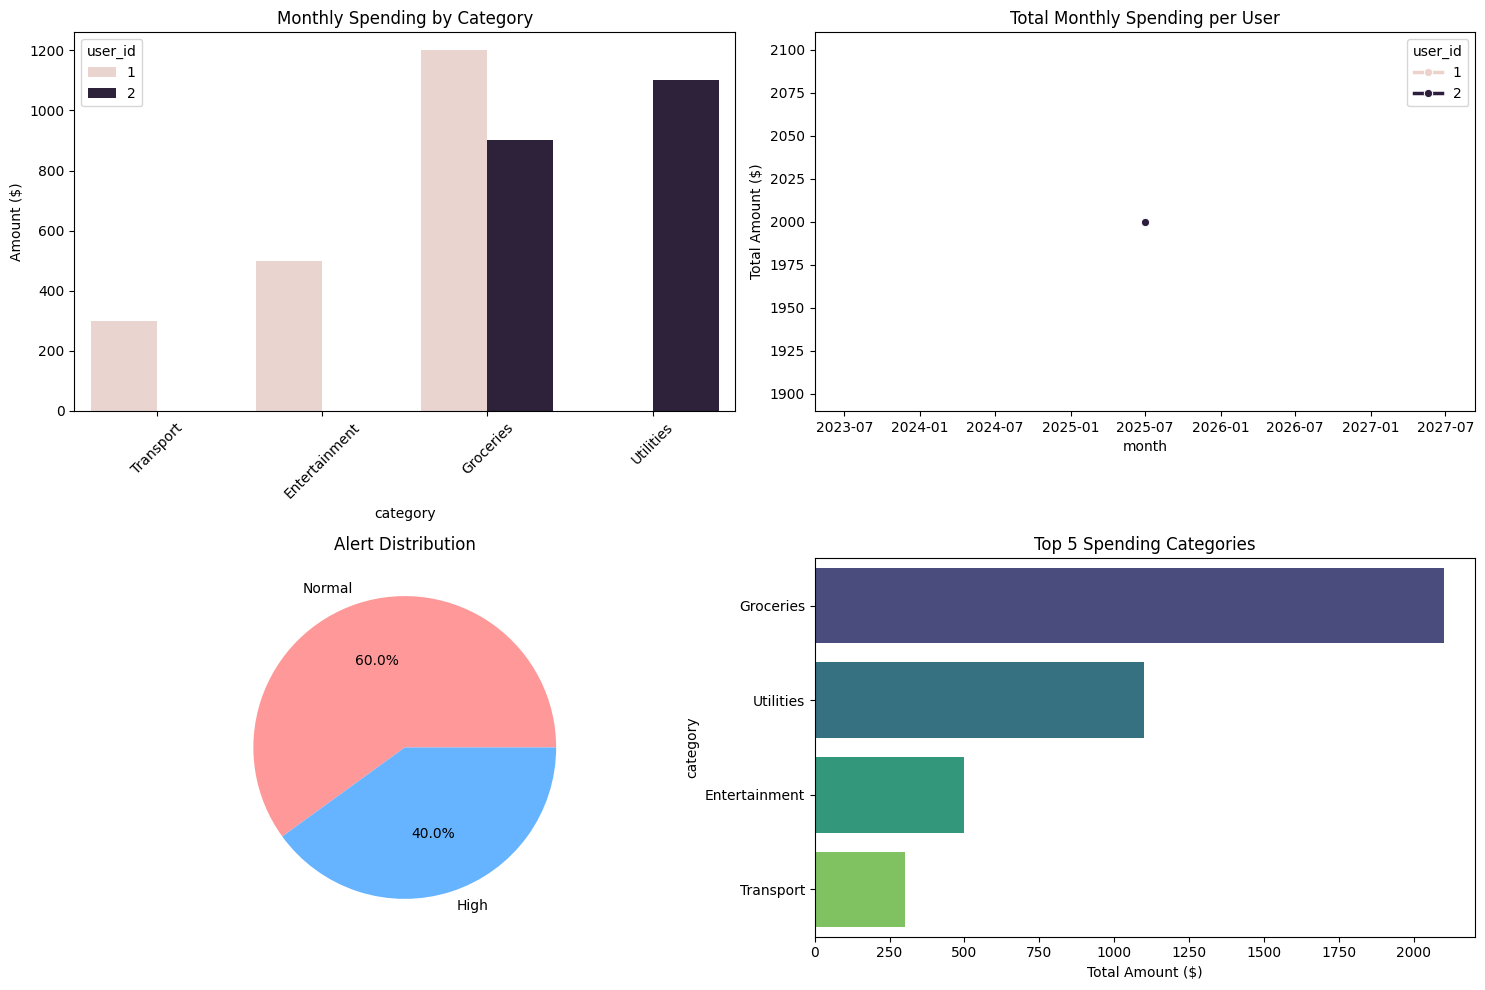


Analysis complete!
Saved files:
- monthly_spend_by_category (directory)
- total_monthly_spend (directory)
- alerts_data (directory)
- spending_by_category.png


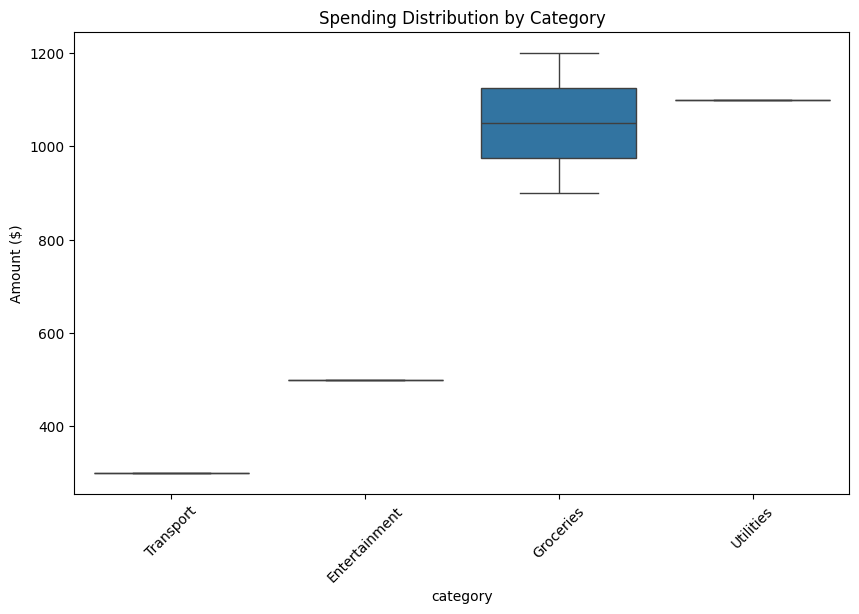

In [8]:
# Install required packages


from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Spark session
# spark = SparkSession.builder \
#     .appName("ExpenseAnalysis") \
#     .getOrCreate()

# 1. Load and prepare data
df = spark.read.csv("/content/cleaned_expenses.csv", header=True, inferSchema=True)

# Show the data
print("Original data:")
df.show(5)



In [9]:
# 2. Create summary tables
# Monthly spend by category
monthly_spend = df.groupBy("user_id", "month", "category") \
                 .agg(sum("amount").alias("total_amount")) \
                 .orderBy("user_id", "month")

# Total monthly spend per user
total_monthly = df.groupBy("user_id", "month") \
                .agg(sum("amount").alias("total_spend")) \
                .orderBy("user_id", "month")

# Add alerts
alerts_df = monthly_spend.withColumn("alert",
                                   when(col("total_amount") > 1000, "High")
                                   .otherwise("Normal"))

# Convert to pandas for visualization
monthly_spend_pd = monthly_spend.toPandas()
total_monthly_pd = total_monthly.toPandas()
alerts_pd = alerts_df.toPandas()


Text(0, 0.5, 'Amount ($)')

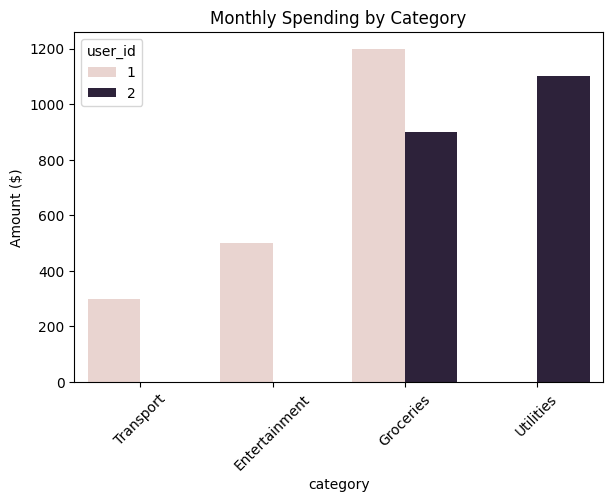

In [10]:
# 3. Visualizations
plt.figure(figsize=(15, 10))

# Visualization 1: Monthly spending by category
plt.subplot(2, 2, 1)
sns.barplot(data=monthly_spend_pd, x="category", y="total_amount", hue="user_id")
plt.title("Monthly Spending by Category")
plt.xticks(rotation=45)
plt.ylabel("Amount ($)")


Text(0.5, 1.0, 'Alert Distribution')

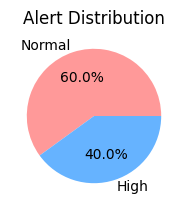

In [11]:
# Visualization 3: Alert distribution
plt.subplot(2, 2, 3)
alert_counts = alerts_pd['alert'].value_counts()
plt.pie(alert_counts, labels=alert_counts.index, autopct='%1.1f%%',
        colors=['#ff9999','#66b3ff'])
plt.title("Alert Distribution")


/tmp/ipython-input-1483538105.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


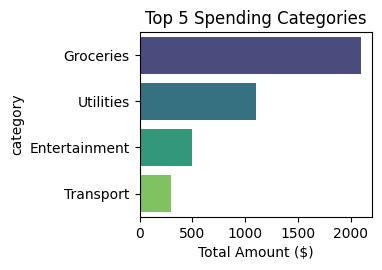

In [12]:
# Visualization 4: Top spending categories
plt.subplot(2, 2, 4)
top_categories = monthly_spend_pd.groupby('category')['total_amount'].sum().nlargest(5)
sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")
plt.title("Top 5 Spending Categories")
plt.xlabel("Total Amount ($)")

plt.tight_layout()
plt.show()


In [ ]:
# 4. Save results
# Save DataFrames
monthly_spend.write.csv("monthly_spend_by_category", header=True, mode="overwrite")
total_monthly.write.csv("total_monthly_spend", header=True, mode="overwrite")
alerts_df.write.csv("alerts_data", header=True, mode="overwrite")



Analysis complete!
Saved files:
- monthly_spend_by_category (directory)
- total_monthly_spend (directory)
- alerts_data (directory)
- spending_by_category.png


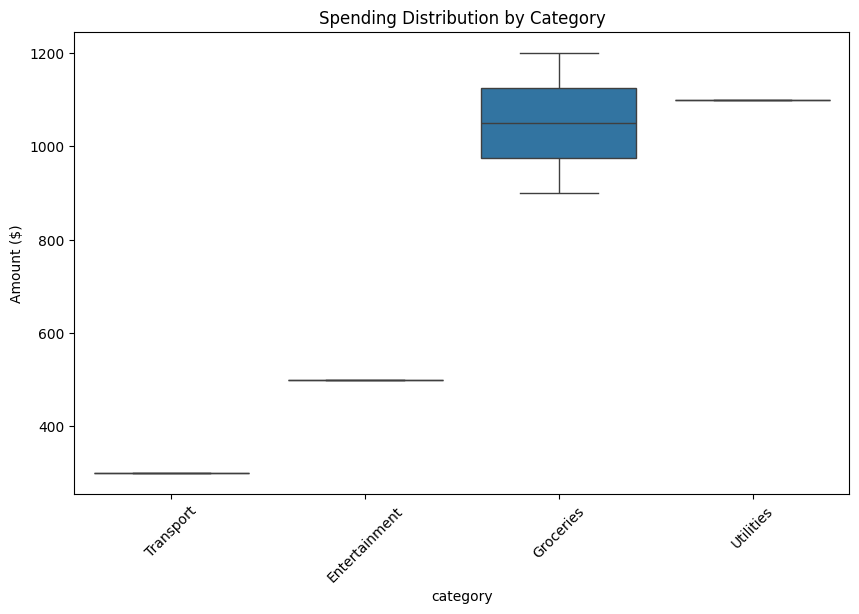

In [13]:
# Save visualizations
plt.figure(figsize=(10, 6))
sns.boxplot(data=monthly_spend_pd, x="category", y="total_amount")
plt.title("Spending Distribution by Category")
plt.xticks(rotation=45)
plt.ylabel("Amount ($)")
plt.savefig('spending_by_category.png', bbox_inches='tight')

print("\nAnalysis complete!")
print("Saved files:")
print("- monthly_spend_by_category (directory)")
print("- total_monthly_spend (directory)")
print("- alerts_data (directory)")
print("- spending_by_category.png")

# Stop Spark session
# spark.stop()